In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../outputs/results_ml100k.csv')
df.head()

,dataset,similarity_metric,community_detector,algorithm_rec,test_size,split_id,rmse,mse,mae
0,ml-100k,euclidean,Not-Applicable,SVD,0.25,1,0.938389,0.880574,0.737989
1,ml-100k,euclidean,Not-Applicable,k-NN,0.25,1,0.981927,0.964180,0.775163
2,ml-100k,euclidean,Not-Applicable,NMF,0.25,1,0.965042,0.931307,0.758186
3,ml-100k,euclidean,Not-Applicable,Co-Clustering,0.25,1,0.980492,0.961364,0.766975
4,ml-100k,euclidean,Louvain,SVD,0.25,1,1.237006,1.530184,1.001325


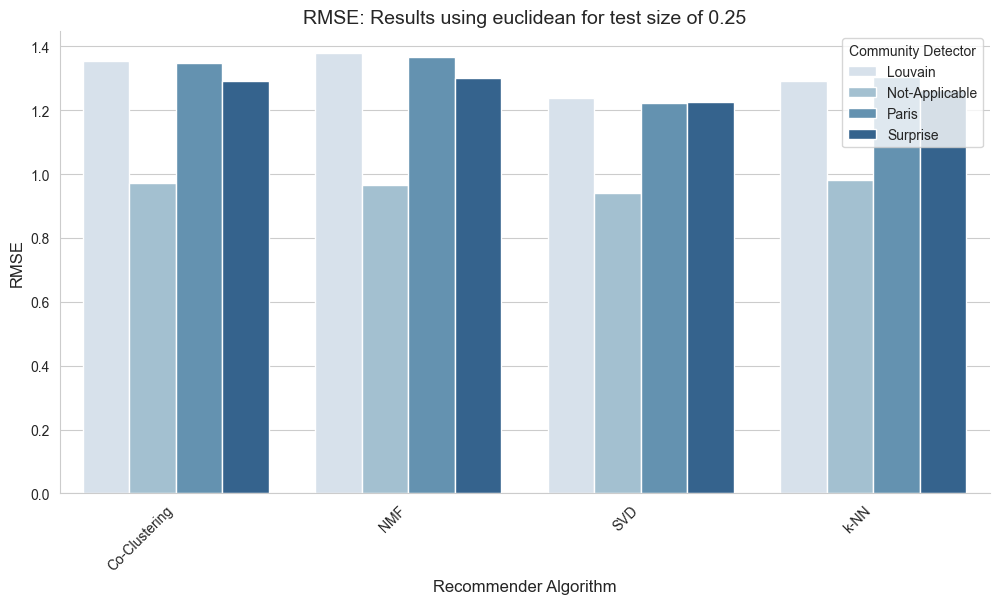

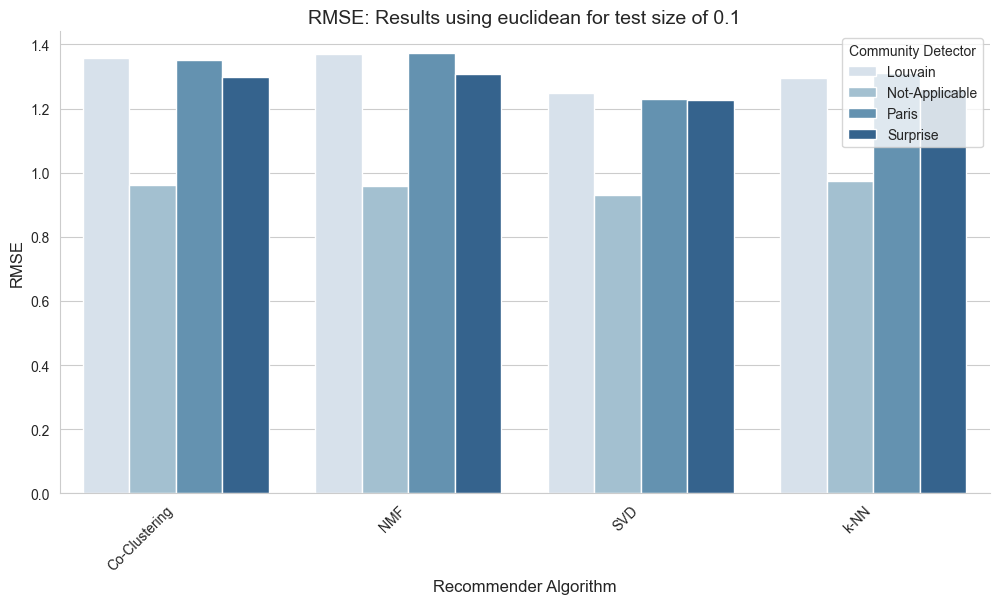

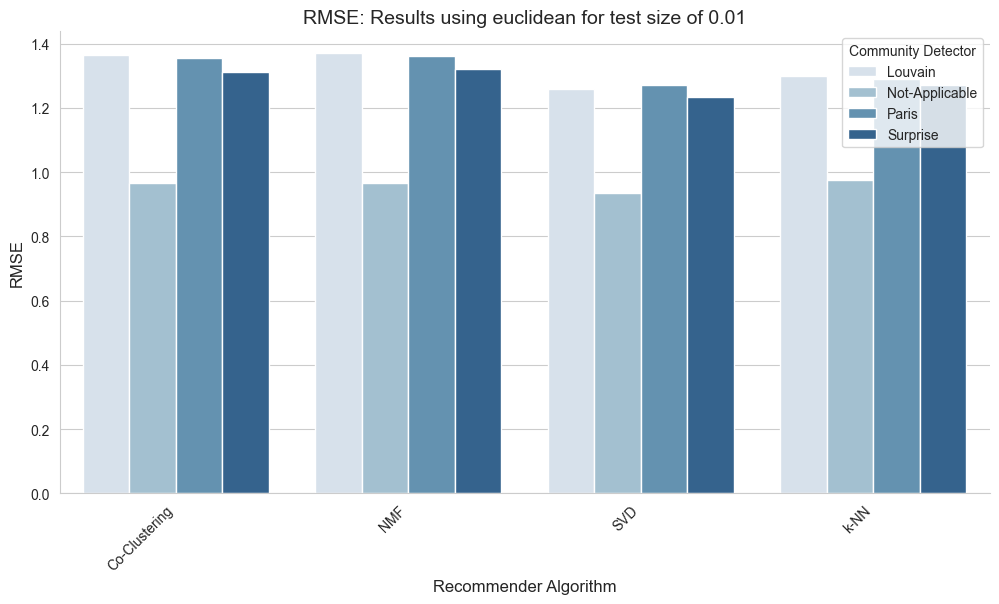

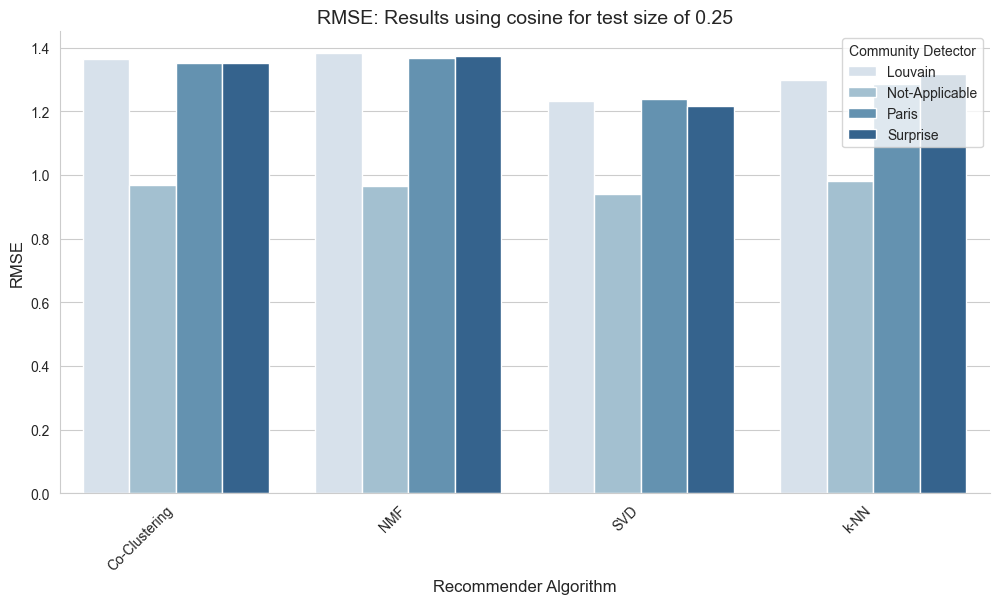

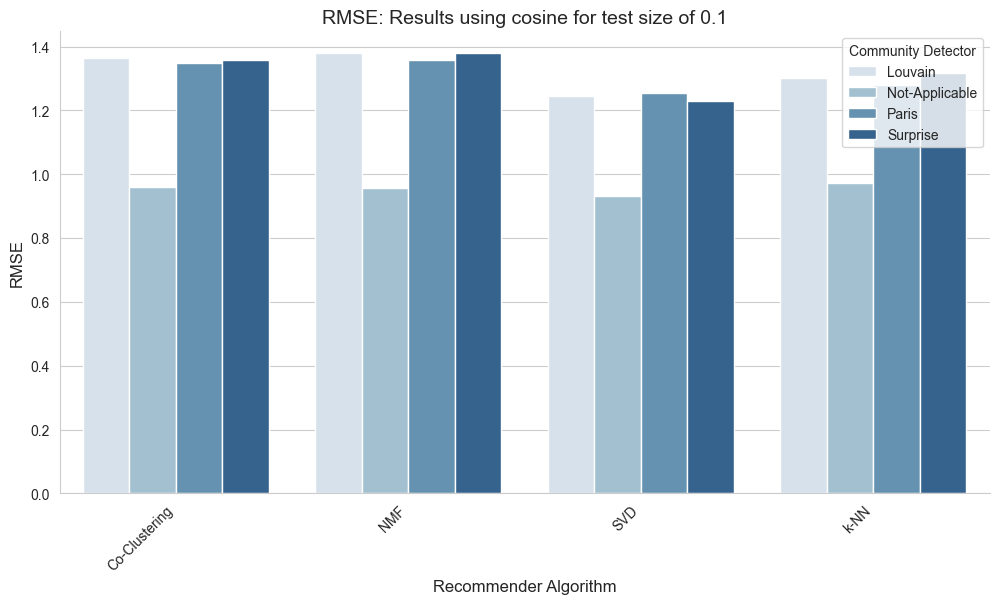

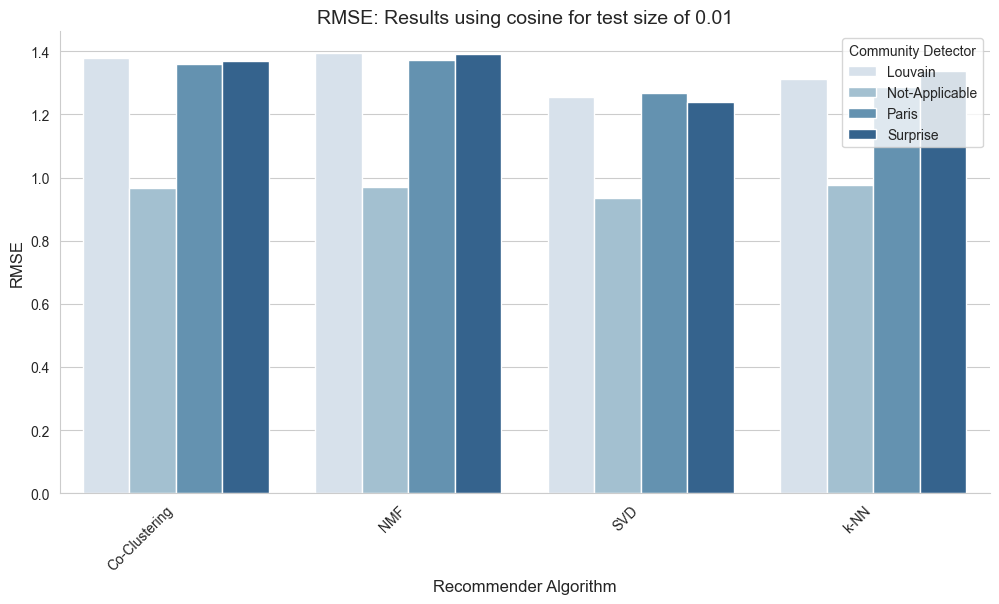

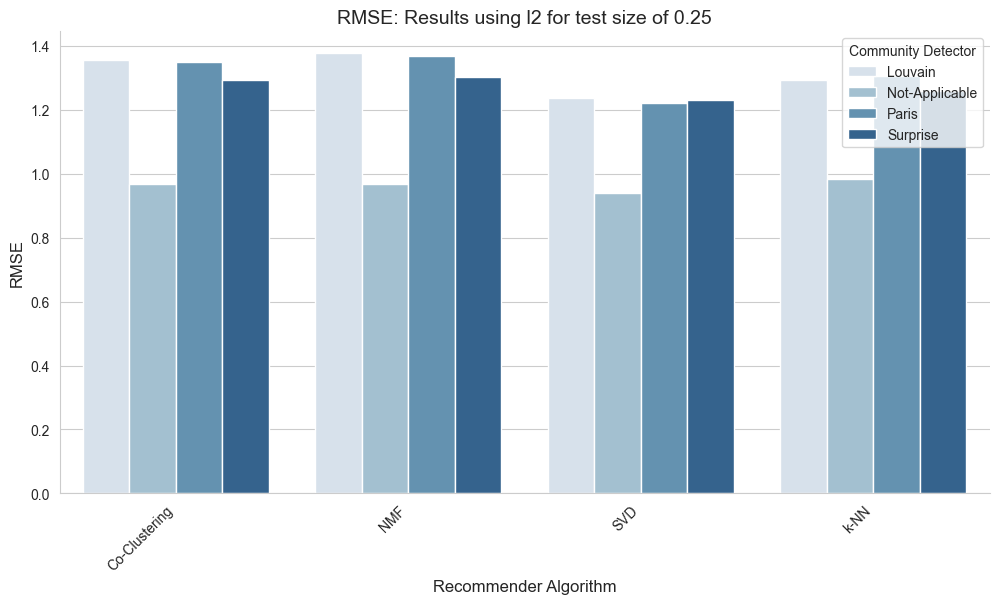

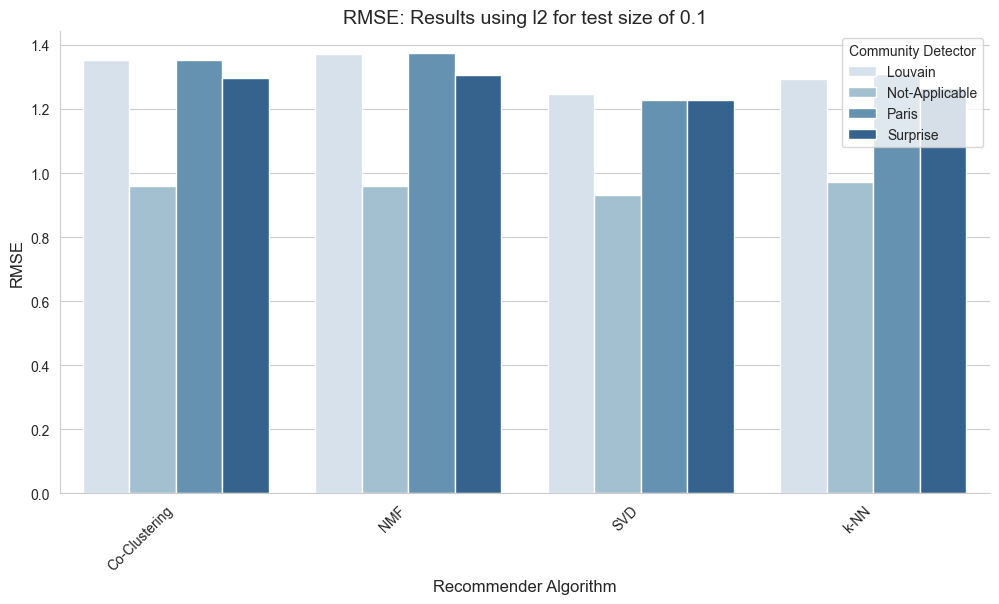

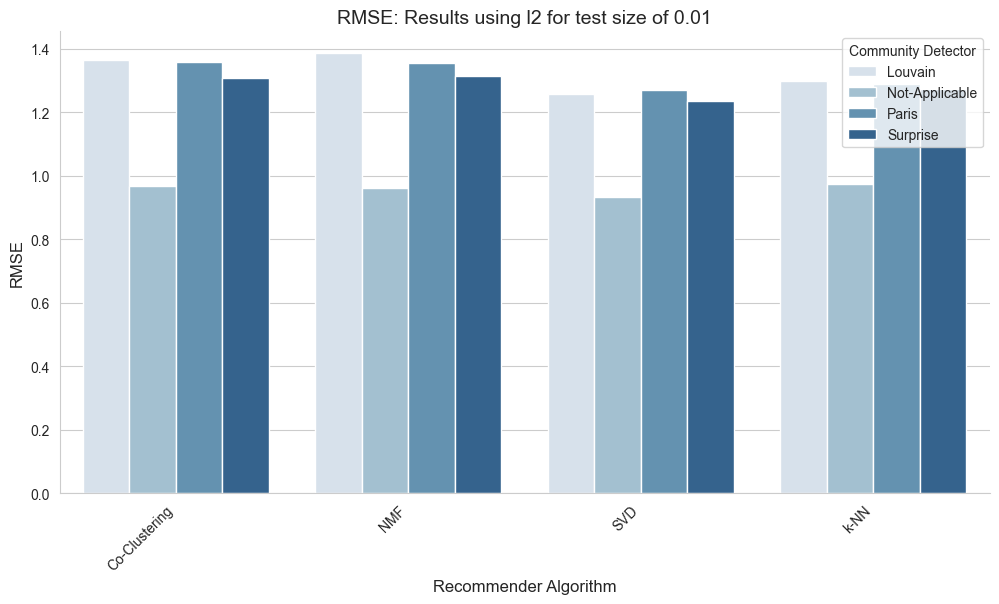

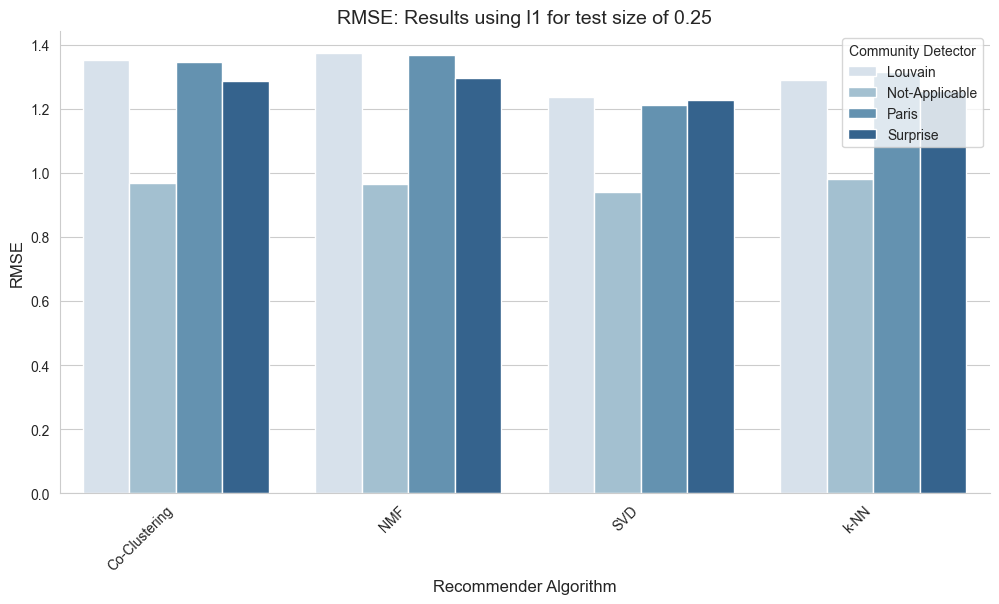

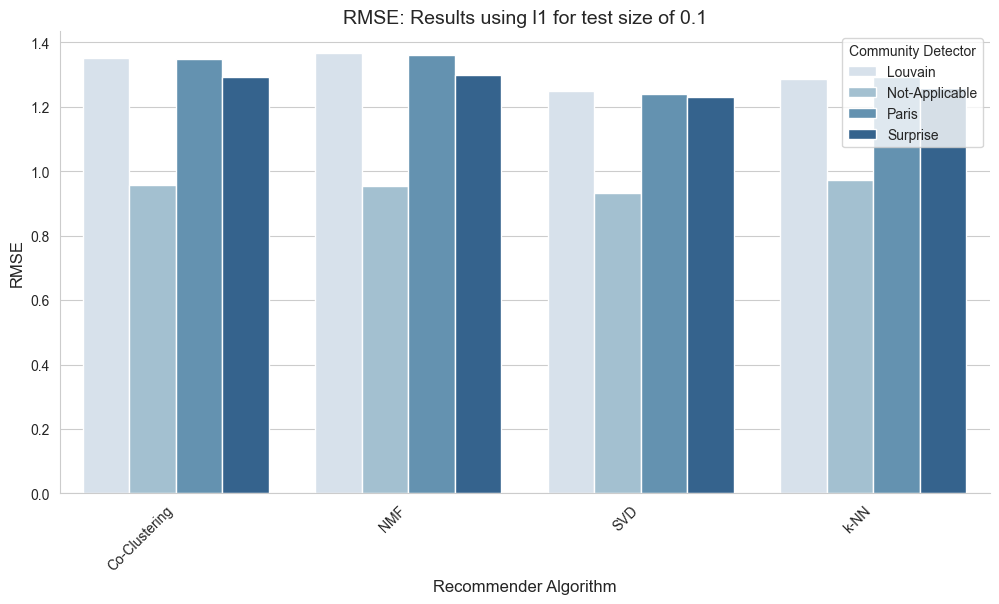

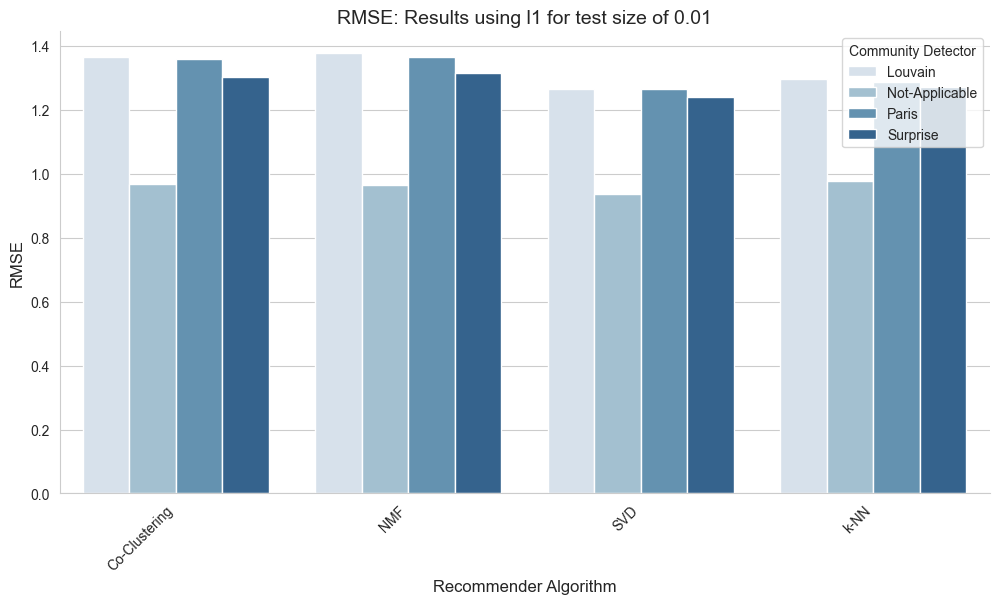

In [5]:
for metric in list(set(df.similarity_metric)):
    for size in list(set(df.test_size)):
        data = df[(df['similarity_metric'] == metric) & (df['test_size'] == size)]
        rmse = data.groupby(['algorithm_rec', 'community_detector'])['rmse'].mean().reset_index()
        rmse = rmse.sort_values(by='algorithm_rec')
        colors = sns.color_palette('Blues', n_colors=len(rmse['community_detector'].unique()), desat=0.8)
        plt.figure(figsize=(12, 6))
        sns.barplot(x='algorithm_rec', y='rmse', hue='community_detector', data=rmse, palette=colors)
        plt.xlabel('Recommender Algorithm', fontsize=12)
        plt.ylabel('RMSE', fontsize=12)
        plt.title(f'RMSE: Results using {metric} for test size of {size}', fontsize=14)
        plt.legend(title='Community Detector', fontsize=10)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        sns.despine()
        sns.set_style("whitegrid")
        plt.savefig(f'../plots/result_{metric}_{size}.png')
        plt.show()
        
        